In [25]:
import pickle
import os
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt

In [26]:
# 加载时间轴
with open('../data_target_01/ec_time_axis.pkl', 'rb') as f:
    ec_time = pickle.load(f)

with open('../data_target_01/observation_wind_time.pkl', 'rb') as f:
    wind_time = pickle.load(f)
    
with open('../data_target_01/observation_temp_rain_time.pkl', 'rb') as f:
    temp_rain_time = pickle.load(f)

In [27]:
# 加载数据
with open('../data_target_01/ec_interpolated.pkl', 'rb') as f:
    ec_data = pickle.load(f)

with open('../data_target_01/observation_wind.pkl', 'rb') as f:
    wind_data = pickle.load(f)
    
with open('../data_target_01/observation_temp_rain.pkl', 'rb') as f:
    temp_rain_data = pickle.load(f)

In [28]:
#
print(ec_time.shape, wind_time.shape, temp_rain_time.shape)

(3416,) (8040,) (8784,)


In [29]:
print(ec_data.keys())
print(wind_data.keys())
print(temp_rain_data.keys())

dict_keys(['uwnd', 'vwnd', 'temp', 'hght', 'rhum', 'lspe', 'sstk', 't2mm', 'u10m', 'v10m', 'visi', 't2md', 'cape', 'velocity10m', 'degree10m'])
dict_keys(['velocity10m', 'degee10m'])
dict_keys(['temp', 'rain'])


In [30]:
# 找出时间交集
common_time_1 = pd.merge(pd.DataFrame({'time': ec_time}),
                       pd.DataFrame({'time': wind_time}),
                       on='time', how='inner')['time']
common_time = pd.merge(pd.DataFrame({'time': common_time_1}),
                       pd.DataFrame({'time': temp_rain_time}),
                       on='time', how='inner')['time']

In [31]:
pd.to_datetime(common_time)

0      2023-09-01 02:00:00
1      2023-09-01 05:00:00
2      2023-09-01 08:00:00
3      2023-09-01 11:00:00
4      2023-09-01 14:00:00
               ...        
2675   2024-07-31 11:00:00
2676   2024-07-31 14:00:00
2677   2024-07-31 17:00:00
2678   2024-07-31 20:00:00
2679   2024-07-31 23:00:00
Name: time, Length: 2680, dtype: datetime64[ns]

In [32]:
# 找索引
common_times = pd.to_datetime(common_time)
#
time_ec = pd.to_datetime(ec_time)
time_wind = pd.to_datetime(wind_time)
time_temp_rain = pd.to_datetime(temp_rain_time)
#
index_ec = np.where(time_ec.isin(common_times))
index_wind = np.where(time_wind.isin(common_times))
index_temp_rain = np.where(time_temp_rain.isin(common_times))

In [33]:
print(len(index_ec[0]), len(index_wind[0]), len(index_temp_rain[0]))

2680 2680 2680


In [34]:
# 截取时间轴
time_axis = time_ec[index_ec]
time_axis.shape

(2680,)

In [35]:
# 截取数据---观测
obser_velocity = wind_data['velocity10m'].squeeze()[index_wind]
obser_degree = wind_data['degee10m'].squeeze()[index_wind]
obser_temp = temp_rain_data['temp'].squeeze()[index_temp_rain]
obser_rain = temp_rain_data['rain'].squeeze()[index_temp_rain]
print(obser_velocity.shape, obser_degree.shape, obser_temp.shape, obser_rain.shape)

(2680,) (2680,) (2680,) (2680,)


In [36]:
obser_target = {'velocity': obser_velocity, 'degree': obser_degree, 'temp': obser_temp, 'rain': obser_rain}

In [37]:
# 截取数据---EC
model_data = {}
for var in ec_data.keys():
    if var not in ['__header__', '__version__', '__globals__']:
        model_data[var] = ec_data[var].squeeze()[index_ec[0]]
        print(var, model_data[var].shape)

uwnd (2680,)
vwnd (2680,)
temp (2680,)
hght (2680,)
rhum (2680,)
lspe (2680,)
sstk (2680,)
t2mm (2680,)
u10m (2680,)
v10m (2680,)
visi (2680,)
t2md (2680,)
cape (2680,)
velocity10m (2680,)
degree10m (2680,)


In [38]:
# 保存时间轴
with open('../data_target_01/target_time_axis.pkl', 'wb') as f:
    pickle.dump(time_axis, f)

In [39]:
#
with open('../data_target_01/target_observation.pkl', 'wb') as f:
    pickle.dump(obser_target, f)

In [40]:
#
with open('../data_target_01/target_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

## 绘图对比

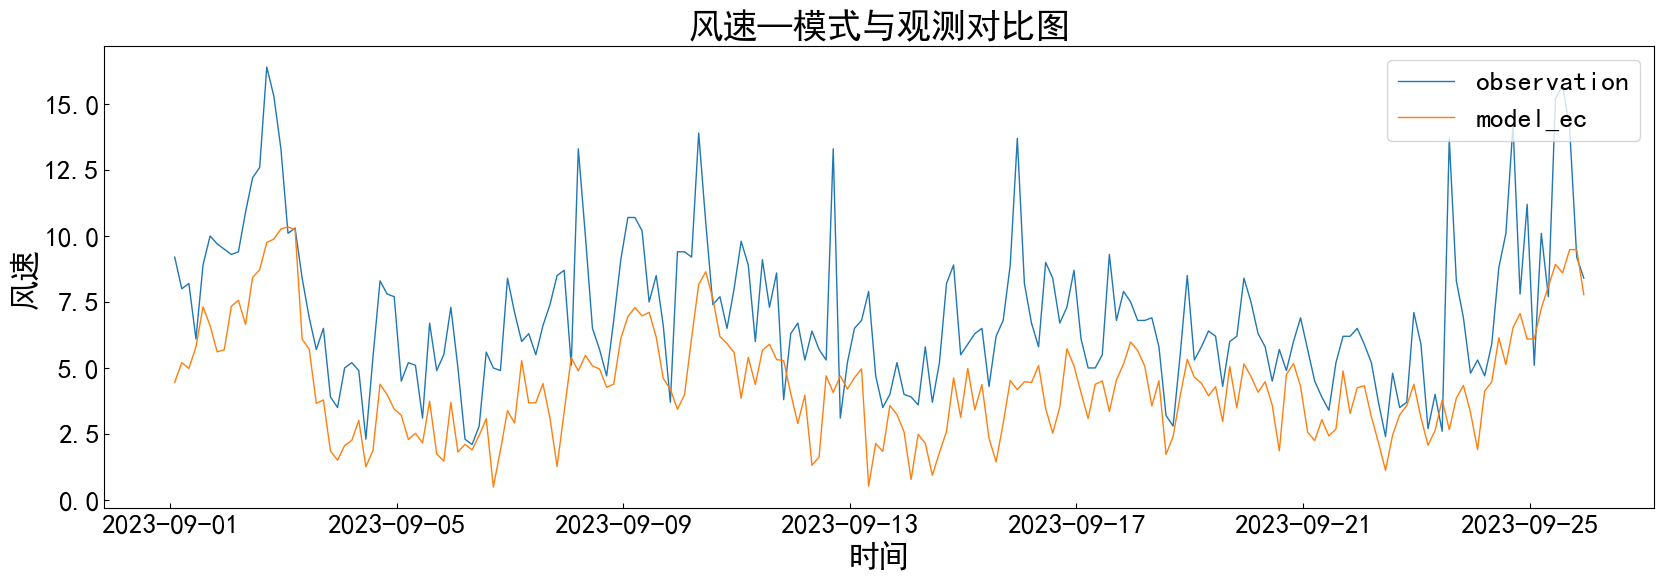

In [41]:
# 绘图
# velocity
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号
size = 3
line_width = 1
plt.figure(figsize=(20, 6))

s = 0
e = 200

plt.plot(pd.to_datetime(time_axis)[s:e], obser_target['velocity'][s:e], linewidth = line_width, label='observation')
plt.plot(pd.to_datetime(time_axis)[s:e], model_data['velocity10m'][s:e], linewidth = line_width, label='model_ec')

plt.tick_params(direction='in', labelsize=20)
plt.xlabel('时间', fontsize=22)
plt.ylabel('风速', fontsize=22)
plt.legend(scatterpoints = 5, loc='upper right', fontsize=20)
plt.title('风速—模式与观测对比图', fontsize=25)
plt.show()

In [42]:
model_data.keys()

dict_keys(['uwnd', 'vwnd', 'temp', 'hght', 'rhum', 'lspe', 'sstk', 't2mm', 'u10m', 'v10m', 'visi', 't2md', 'cape', 'velocity10m', 'degree10m'])

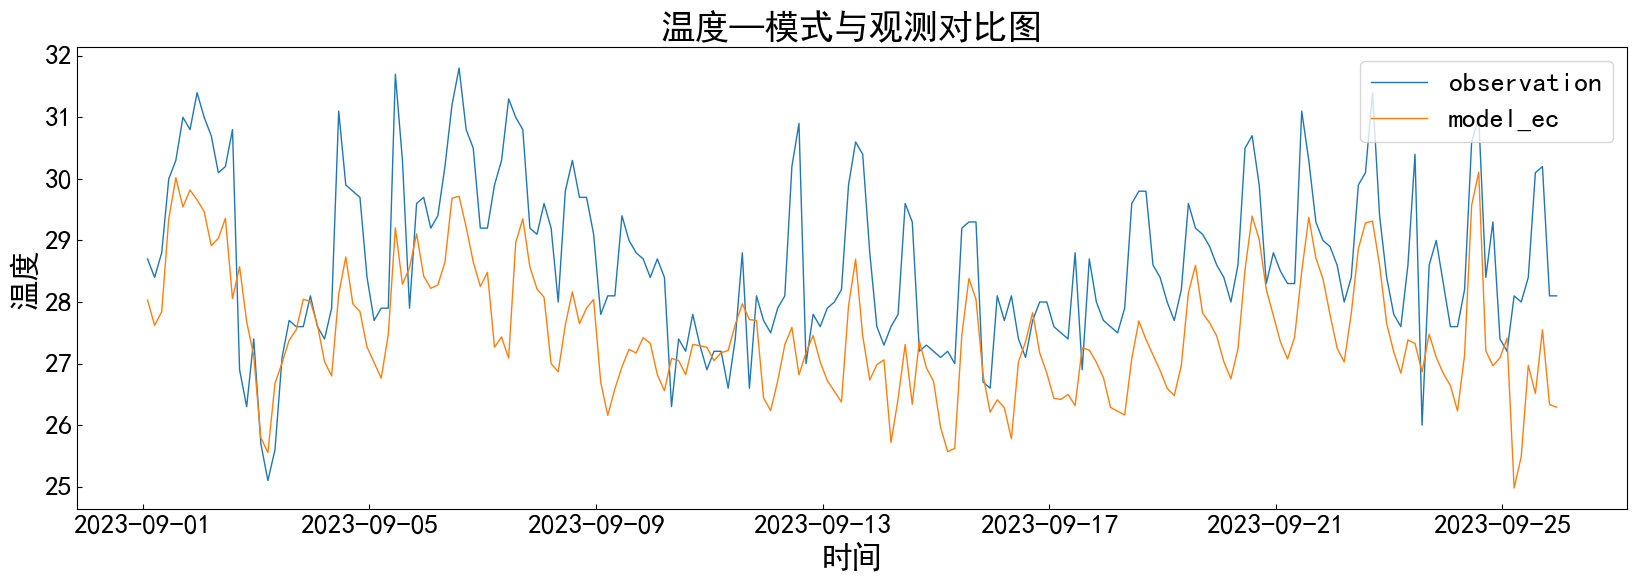

In [43]:
# 绘图
# temp
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号
size = 3
line_width = 1
plt.figure(figsize=(20, 6))

s = 0
e = 200

plt.plot(pd.to_datetime(time_axis)[s:e], obser_target['temp'][s:e], linewidth = line_width, label='observation')
plt.plot(pd.to_datetime(time_axis)[s:e], model_data['temp'][s:e], linewidth = line_width, label='model_ec')

plt.tick_params(direction='in', labelsize=20)
plt.xlabel('时间', fontsize=22)
plt.ylabel('温度', fontsize=22)
plt.legend(scatterpoints = 5, loc='upper right', fontsize=20)
plt.title('温度—模式与观测对比图', fontsize=25)
plt.show()

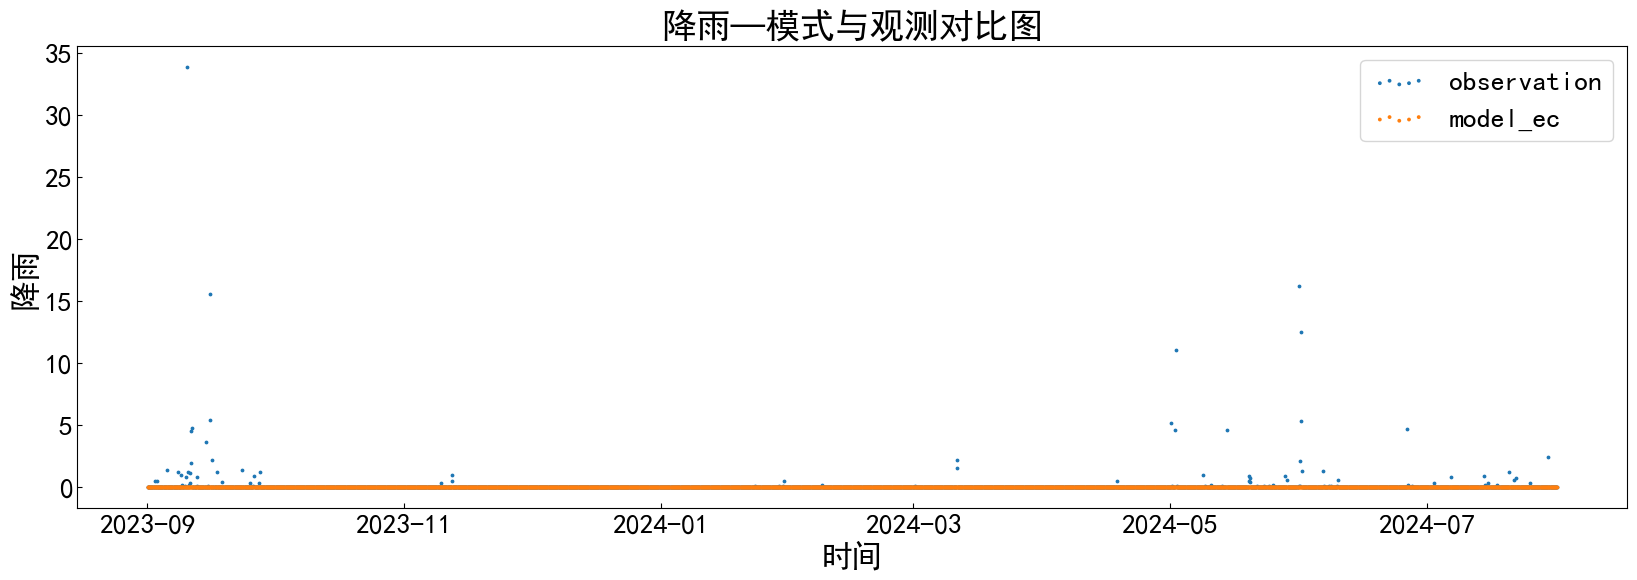

In [44]:
# 绘图
# rain
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号
size = 3
line_width = 1
plt.figure(figsize=(20, 6))

plt.scatter(pd.to_datetime(time_axis), obser_target['rain'], linewidth = line_width, s=size, label='observation')
plt.scatter(pd.to_datetime(time_axis), model_data['lspe'], linewidth = line_width, s=size, label='model_ec')

plt.tick_params(direction='in', labelsize=20)
plt.xlabel('时间', fontsize=22)
plt.ylabel('降雨', fontsize=22)
plt.legend(scatterpoints = 5, loc='upper right', fontsize=20)
plt.title('降雨—模式与观测对比图', fontsize=25)
plt.show()